# Transfer Matrix for the delta potentials 

Link for the reference $\longrightarrow$ https://arxiv.org/pdf/2503.23134


#### Participants :
       Sayan Karmakar          22MS163
       Kondapalli Vara Prasad  22MS161
       Nitesh Kumar Mahto      22MS150
       Gandra Rithvik Rao      22MS160

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


Here we have used reduced planck's constant $\longrightarrow$  $h = 1$

Here we have used transfer matrix approach by taking 2 $\times$ 2  matrices associated with each barrier and the intermediate regions are multiplied to obtain the total transfer matrix

$$ \begin{pmatrix} \tilde{A_1} \\ \tilde{B_1} \end{pmatrix} =  \begin{pmatrix}
(2c - 1)K^{-1} & -K \\
K^{-1} & (2c + 1)K
\end{pmatrix}\begin{pmatrix} \tilde{A_2} \\ \tilde{B_2} \end{pmatrix}$$

$$ \begin{pmatrix} \tilde{A_2} \\ \tilde{B_2} \end{pmatrix}  =  \begin{pmatrix}
(2c - 1)K^{-1} & -K \\
K^{-1} & (2c + 1)K
\end{pmatrix}\begin{pmatrix} \tilde{A_3} \\ \tilde{B_3} \end{pmatrix}$$

$$ \begin{pmatrix} \tilde{A_1} \\ \tilde{B_1} \end{pmatrix} = \left(\frac{\mathbf{T}}{2 c}\right)^N \begin{pmatrix} \tilde{A}_{N+1}  \\0 \end{pmatrix}$$
here k $\longrightarrow $ wave number such that $$ k^2 = \dfrac{2mE}{\hbar^2}$$
here c =  $\dfrac{ik\hbar^2}{2m\lambda}$
since here we used reduced constants c is just simply $$c = ik/2$$
$$ K = e^{ikL}\\$$
$$ T = \begin{pmatrix}
(2c - 1)K^{-1} & -K \\
K^{-1} & (2c + 1)K
\end{pmatrix} \hspace{0.1cm}:= \text{Transfer matrix}$$  

## Defining the Transfer Matrix 

In [12]:
h = 1 # Planck's constant
m = 1 
L = 1 # Distance between two dirac combs
lamda = 1 # Strenght of the potential

def transfer_matrix(k):
    cp = 1j* k* h**2/(2 * m * lamda)
    K =  np.exp(1j * k * L)
    a = (2*cp - 1)/K 
    b = -K 
    c = 1/K 
    d = (2* cp + 1)*K 
    return np.array([[a, b], [c, d]])

## For N = 2 Dirac delta barriers 

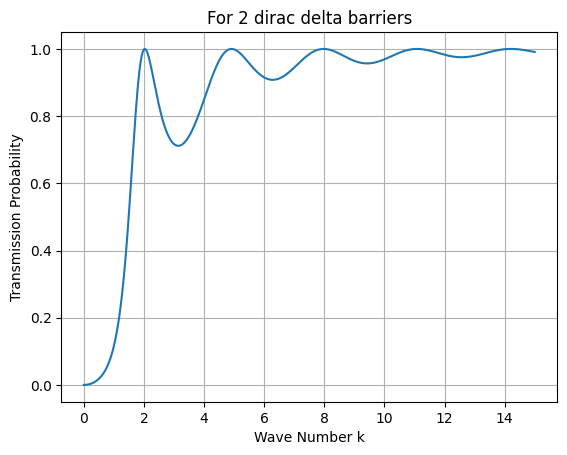

In [13]:
k_vals = np.linspace(0.0,15,1000)
N = 2 # No. of Dirac Combs
T = (((k_vals)**(2*N))/(1e-7+ np.abs(np.array([np.linalg.matrix_power(transfer_matrix(k),N)[0][0] for k in k_vals]))**2))
plt.plot(k_vals, T)
plt.title("For 2 dirac delta barriers")
plt.ylabel("Transmission Probability")
plt.xlabel("Wave Number k")
plt.grid()


## For general N Dirac delta barriers

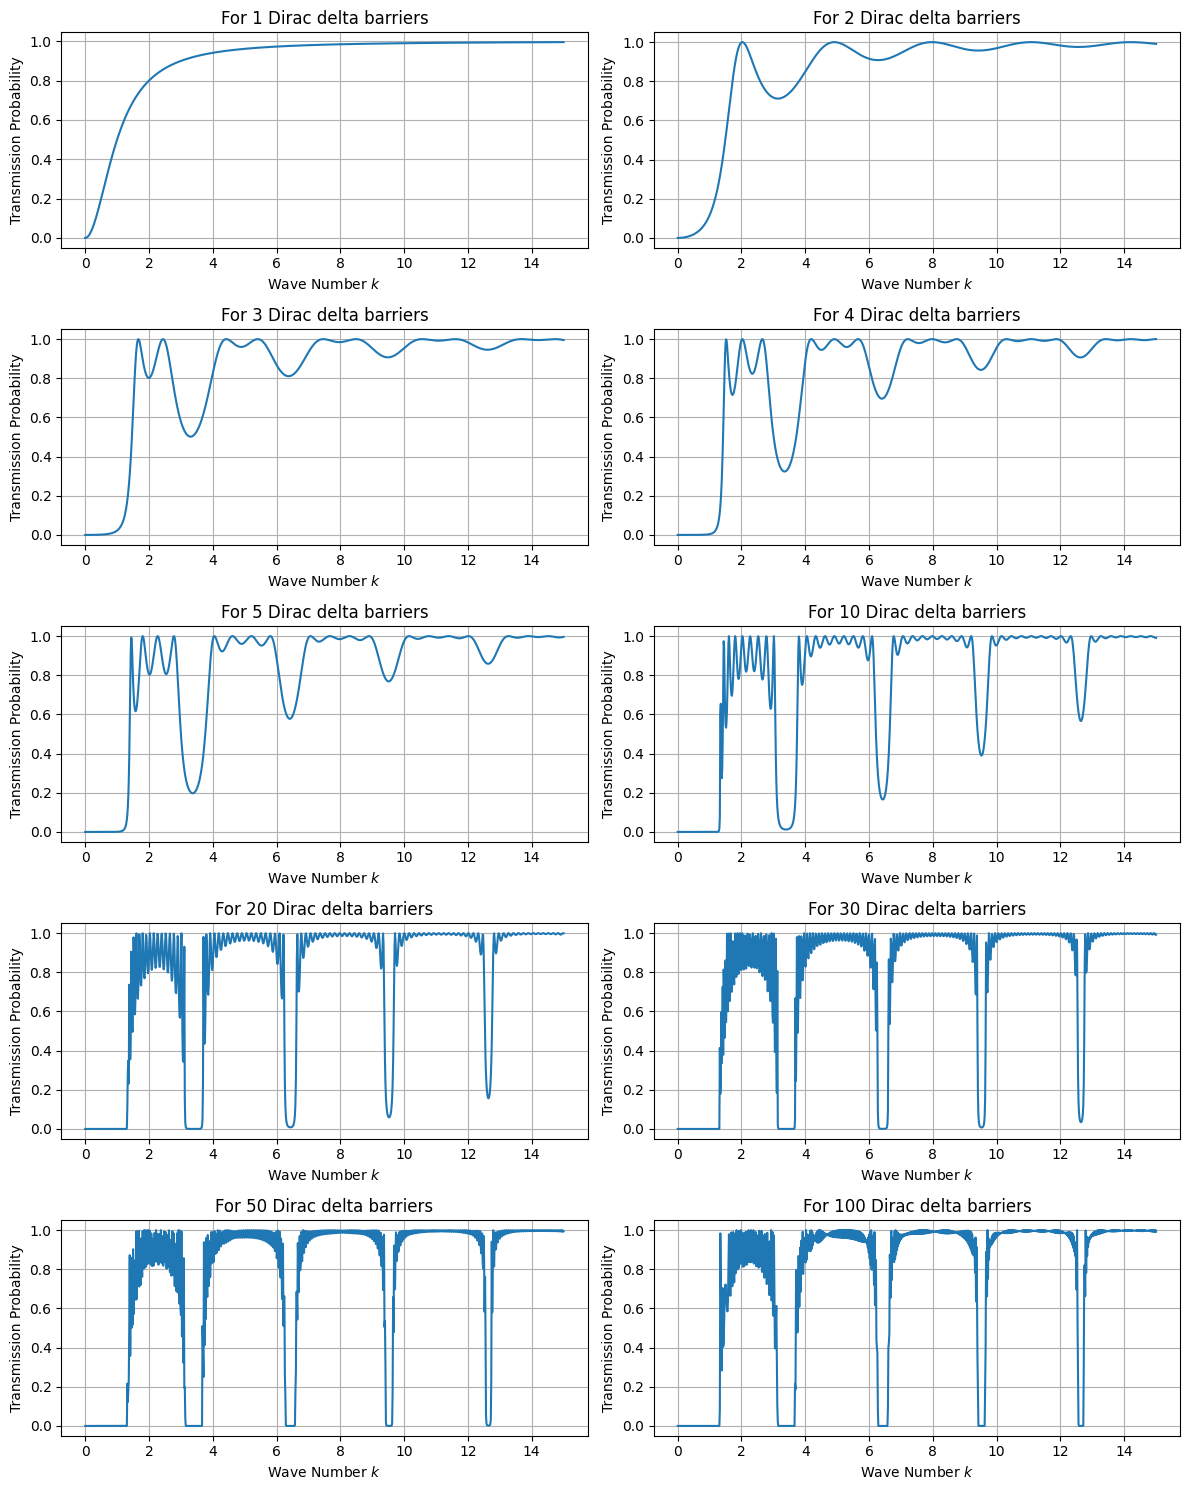

In [18]:
N = [1, 2, 3, 4, 5, 10, 20, 30, 50,100]  # No. of Dirac delta potentials

# Create a figure with 6 rows and 2 columns (can adjust as needed)
fig, axes = plt.subplots(5, 2, figsize=(12, 15))  # Adjust figure size if necessary
axes = axes.flatten()  # Flatten axes array for easy iteration

# Loop over N and plot in the subplots
for idx, i in enumerate(N):
    T = (((k_vals)**(2*i))/(1e-7 + np.abs(np.array([np.linalg.matrix_power(transfer_matrix(k), i)[0][0] for k in k_vals]))**2))
    
    axes[idx].plot(k_vals, T)
    axes[idx].set_title(fr'For {i} Dirac delta barriers')
    axes[idx].set_xlabel("Wave Number $k$")
    axes[idx].set_ylabel("Transmission Probability")
    axes[idx].grid(True)

# Adjust layout to avoid overlap and display the plots
plt.tight_layout()
plt.show();

From these graphs, we see that as $N$ increases the graphs become more like bands, it creates a forbidden zone, for which the particles with that momentum can not penetrate the potential behaviour. This is the expected behaviour. 